In [181]:
import pycbc
from pycbc.waveform import get_td_waveform, get_fd_waveform
import numpy as np
import matplotlib.pyplot as plt

## Frequency domain waveform generation

Check out

get_fd_det_waveform

In [182]:
#pycbc.waveform.waveform.fd_approximants()

In [183]:
#pycbc.waveform.get_fd_waveform?

Check out 

pycbc.waveform.waveform.get_td_waveform_from_fd
pycbc.waveform.waveform.get_waveform_end_frequency

In [196]:
hptilde, hctilde = get_fd_waveform(approximant="IMRPhenomD", mass1=50, mass2=50, distance=1000, spin1z=0.2, spin2z=0.8, inclination=1.0, f_lower=20, f_final=4096, delta_f=1/16)

In [197]:
httilde = hptilde+hctilde
print(httilde)
print(len(httilde))
print(httilde.sample_frequencies[-1])

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
65537
4096.0


Text(0, 0.5, 'Strain')

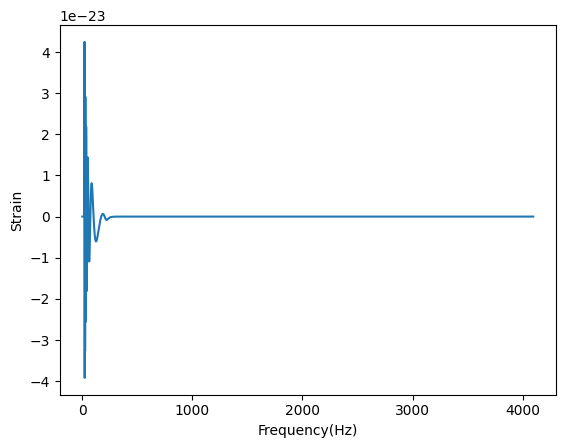

In [198]:
plt.plot(httilde.sample_frequencies, httilde)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Strain")

## Time domain waveform generation

In [199]:
hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=50, mass2=50, distance=1000, spin1z=0.2, spin2z=0.8, inclination=1.0, f_lower=20, delta_t=1/4096)

In [200]:
ht = hp+hc
print(ht)
print(len(ht))
print(ht.sample_times[-1])

[7.33211341e-27 7.32022760e-27 7.29841278e-27 ... 7.33199634e-27
 7.33505270e-27 7.33605477e-27]
65536
4.999755859375


Text(0, 0.5, 'Strain')

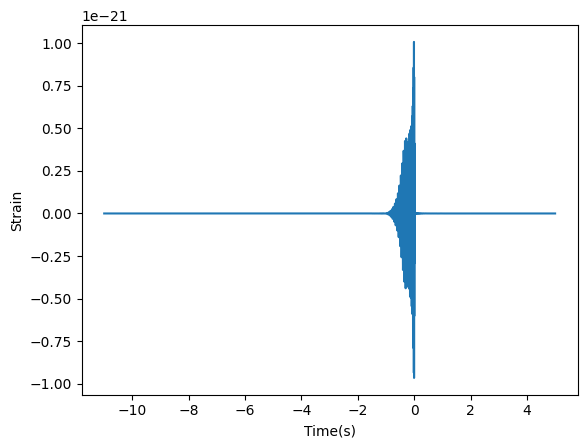

In [201]:
plt.plot(ht.sample_times, ht)
plt.xlabel("Time(s)")
plt.ylabel("Strain")

## Cyclic time shift has to applied to make the max amplitude at the end of the timeseries ; it is also required to do this before applying FFT

Text(0, 0.5, 'Strain')

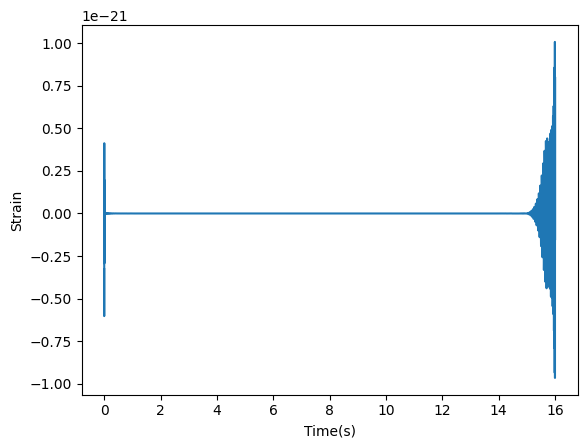

In [202]:
ht= ht.cyclic_time_shift(ht.start_time)

plt.plot(ht.sample_times, ht)
plt.xlabel("Time(s)")
plt.ylabel("Strain")

## FFT from time to frequency domain and vice versa 

In [203]:
httilde2= ht.to_frequencyseries()
print(len(httilde2))
print(httilde2.sample_frequencies[-1])

32769
2048.0


Text(0, 0.5, 'Strain')

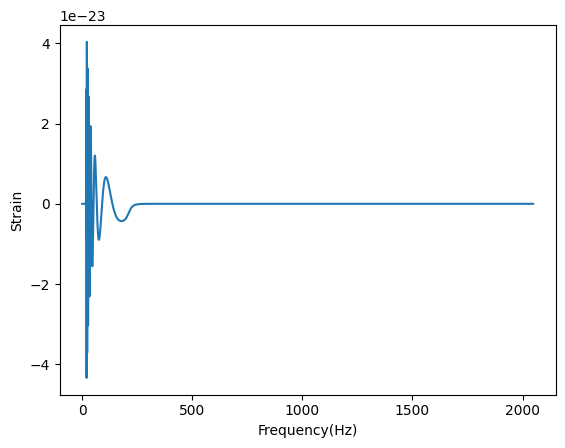

In [204]:
plt.plot(httilde2.sample_frequencies, httilde2)
plt.xlabel("Frequency(Hz)")
plt.ylabel("Strain")

In [205]:
ht2 = httilde.to_timeseries()

Text(0, 0.5, 'Strain')

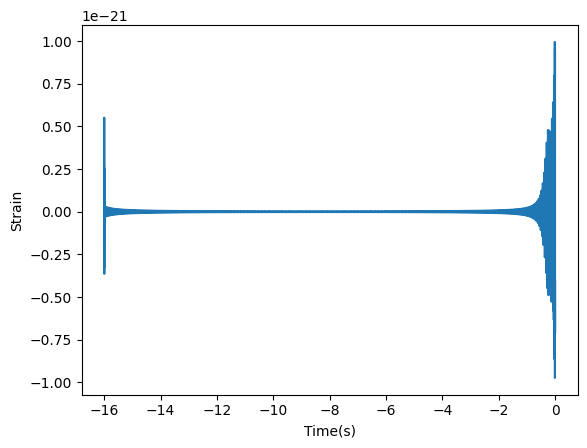

In [206]:
plt.plot(ht2.sample_times, ht2)
plt.xlabel("Time(s)")
plt.ylabel("Strain")